In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### 1. Programmieraufgabe

-0.3826834323650897
[ 4.24264069e+00  3.67394040e-16 -4.24264069e+00 -6.00000000e+00]


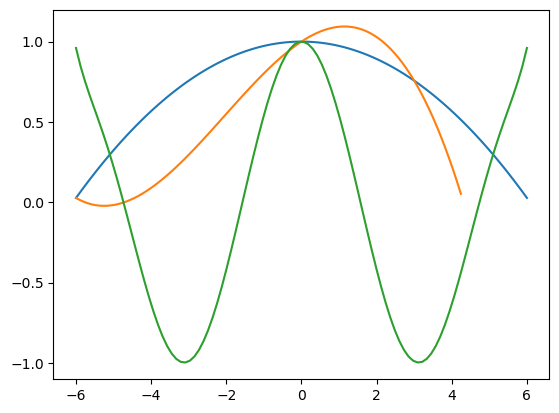

In [418]:
def interpoly(x, f):
    polynomial = np.poly1d(0)

    for i in range(len(x)):
        tempfunc = 1
        for j in range(len(x)):
            if i != j:
                tempfunc *= np.poly1d([1, -x[j]])/ (x[i]-x[j])
        polynomial += tempfunc * f[i]
    
    points = np.linspace(np.min(x), np.max(x), 100)
    pointsF = [polynomial(point) for point in points]

    plt.plot(points, pointsF)

f = lambda x: 1/(1+x**2)

x = np.linspace(-6, 6, 3)
y = np.array([f(point) for point in x])

interpoly(x, y)

t = lambda a, b, n, j: (a+b)/2 + (b-a)/2 * np.cos(((2*j - 1) / (2*(n+1))) * np.pi)

x_T = np.array([t(-6, 6, 3, i+1) for i in range(3)])
print(np.cos(((2*3 - 1) / (2*(3+1))) * np.pi))
print(x_T)
y_T = np.array([f(point) for point in x_T])

interpoly(x_T, y_T)

f = lambda x: np.cos(x)

x = np.linspace(-6, 6, 9);
y = np.array([f(point) for point in x])

interpoly(x, y)

### 3. Programmieraufgabe

In [419]:
def ableitungsplot(f,a,b,n,h):
    # Wertepaare ausrechnen
    x = np.linspace(a,b,n)
    y = np.zeros(n, dtype=np.double) # Funktion
    y1 = np.zeros(n, dtype=np.double) # erste Ableitung
    y2 = np.zeros(n, dtype=np.double) # zweite Ableitung
    for i in range(n):
        y[i] = f(x[i])
        y1[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
        y2[i] = (f(x[i]-h)-2*f(x[i])+f(x[i]+h))/(h**2)
    
    # Plot der Funktionen
    plt.clf()
    plt.plot(x, y, color = 'black', linewidth=0.6, label="Funktion f(x)") 
    plt.plot(x, y1, color = 'blue', linewidth=0.6, label="Erste Ableitung f'(x)")
    plt.plot(x, y2, color = 'cyan', linewidth=0.6, label="Zweite Ableitung f''(x)")
    plt.legend(loc="upper right")
    plt.xlim(a,b)
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und den ersten beiden Ableitungen", pad ='15')
    plt.show() 

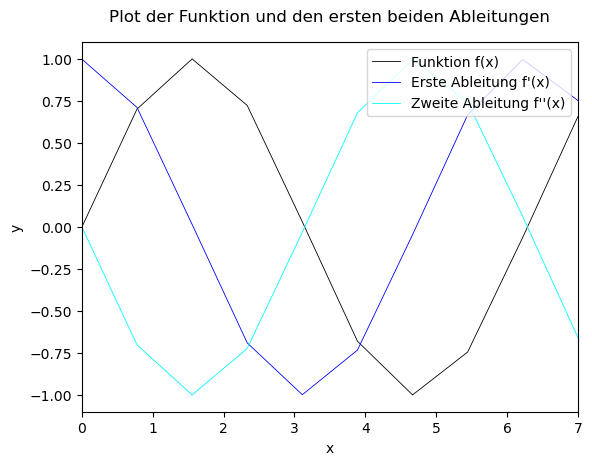

In [420]:
a = 0
b = 7
n = 10
h = 0.1
def f(x):
    f = np.sin(x)
    return f

ableitungsplot(f,a,b,n,h)

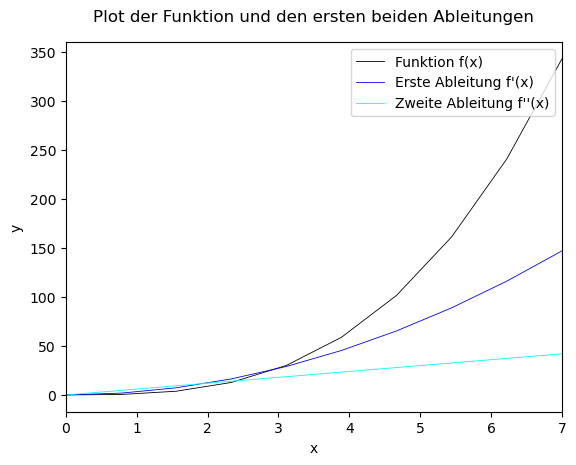

In [421]:
a = 0
b = 7
n = 10
h = 0.1
def f(x):
    f = x**3
    return f

ableitungsplot(f,a,b,n,h)

### 4. Programmieraufgabe

In [422]:
def integral(f,a,b,n):
    t = np.zeros(1, dtype=np.double)
    s = np.zeros(1, dtype=np.double)
    h = (b-a)/(n-1)
    x = np.array([a],dtype=np.double)
    for i in range(n):
        x = np.append(x, a+(i+1)*h)
        #summierte Trapezregel
        t = np.append(t, h/2*(f(x[i])+f(x[i+1])))
        #summierte Simpsonregel
        s = np.append(s, h/6*(f(x[i])+4*f((x[i]+x[i+1])/(2))+f(x[i+1])))
    T = np.sum(t)   
    S = np.sum(s)
    return T,S

def f(x):
    f = x**3
    return f

In [423]:
a = 0
b = 1
n = 100
[T,S] = integral(f,a,b,n)
print("Nach der summierten Trapezregel gilt: T=",T)
print("Nach der summierten Simpsonregel gilt: S=", S)

Nach der summierten Trapezregel gilt: T= 0.26028111443019636
Nach der summierten Simpsonregel gilt: S= 0.2602550889213043
